<a href="https://colab.research.google.com/github/wzy816/fundamentals/blob/master/027.em.gmm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EM-GMM

Expectation Maximization Algorithm for Gaussian Mixture Model

refer to section 9.2.2 in book `<Pattern Recognition and Machine Learning>`

## TODO
- derivative of log likelihood with respect to mu and sigma
- sigma update use outer product, why?

(1000, 2)


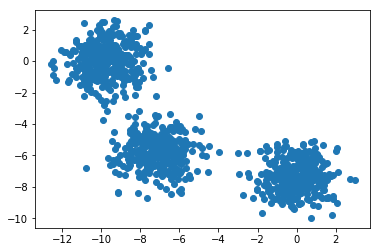

In [180]:
# generate dataset

from sklearn.datasets.samples_generator import make_blobs

K = 3
x,y = make_blobs(n_samples=1000, centers=K, cluster_std=1, random_state=K*K)
print(x.shape)

# plot dataset
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1])
plt.show()

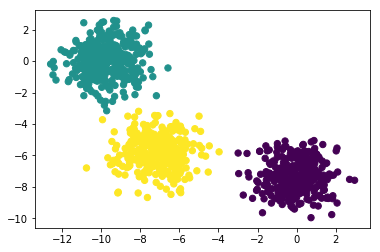

In [181]:
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.cluster import KMeans

# try k_means clustering
k_means = KMeans(K, random_state=0).fit(x)

labels = k_means.predict(x)
plt.scatter(x[:, 0], x[:, 1], c=labels, s=40, cmap='viridis');

## 基本思路

给定一些观测数据，假设他们来自K个cluster，每个cluster为一个multivariate guassian distribution， 通过不断迭代模型的参数（mu，sigma和pi），使得基于当前参数生成观测数据的可能性likelihood最大。

In [0]:
# plot dataset with all mean point overlay
def plot_centers(dataset, mean):
    plt.figure()
    plt.scatter(dataset[:, 0], dataset[:, 1], c=labels, s=40, cmap='viridis');
    plt.scatter(mean[:,0],mean[:,1], c='red')
    plt.show()


In [0]:
# define constant

# N, total number of data points
# D, dimension of each data point
N,D = x.shape

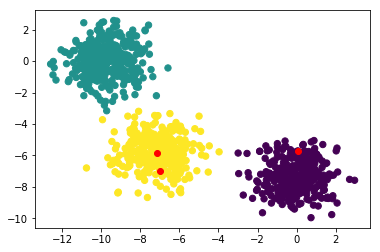

In [184]:
# initialize model parameter,

# mu is the mean of multivariate normal of all clusters, K * D
# mu = k_means.cluster_centers_ # option 1, use center from k-means as initial miu
mu = x[np.random.randint(0,N,K),:] # option 2, use random selected point as center


# signa is the covariance of multivariate normal of all clusters, K * D * D
sigma = np.tile(np.eye(D,D).ravel(),K).reshape((K,D,D))

# pi is the mixture coefficient, how each cluster contribute each data
pi =  np.repeat(1/K, K)


plot_all(x,mu)


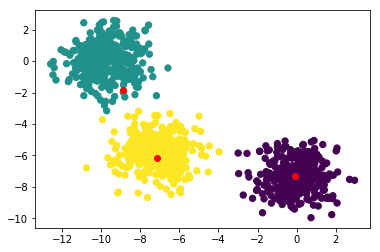

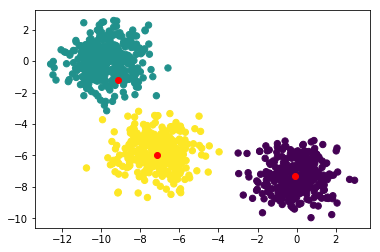

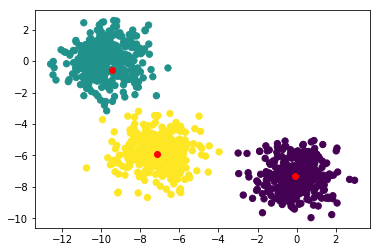

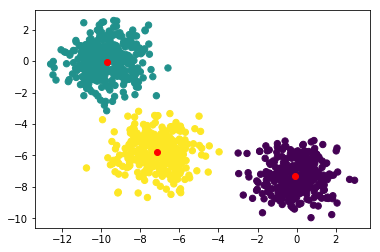

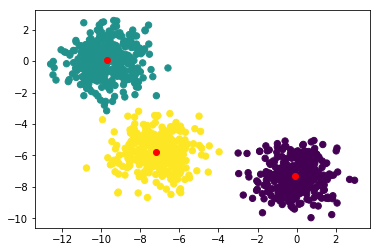

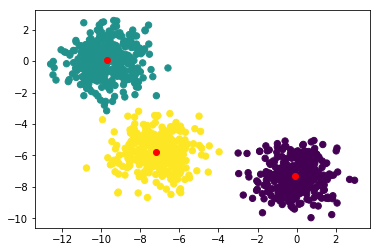

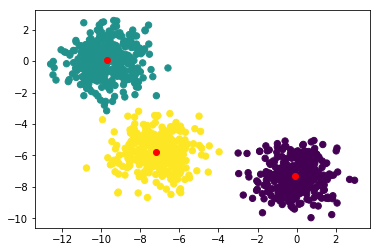

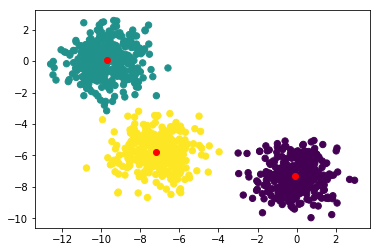

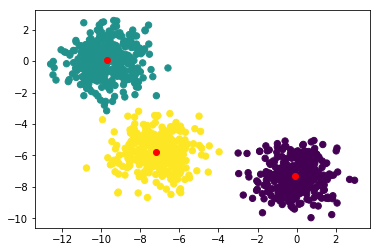

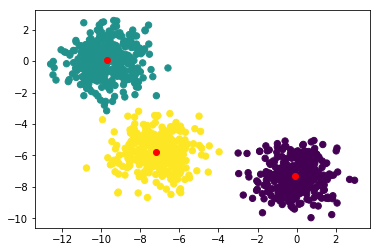

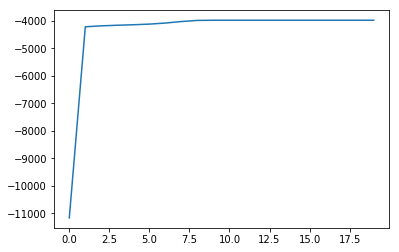

In [185]:
from scipy.stats import multivariate_normal

# initialize iterations

gamma = np.zeros((N,K))
max_steps = 20
log_likelihood = []

for step in range(max_steps):
    
    # E step
    
    for n in range(N):
        for k in range(K):
            # compute the responsibility that k cluster takes for explaining data x[n]
            gamma[n,k] = pi[k] * multivariate_normal.pdf(x[n,:], mean=mu[k], cov=sigma[k,:])  # equation (9.13)
             
    # compute log likelihood
    log_likelihood.append(np.log(gamma.sum(axis=1)).sum()) # equation 9.14
    
    gamma = gamma / gamma.sum(axis=1)[:,np.newaxis]  # continue 9.13
    

    # M step
    
    nk = gamma.sum(axis=0)

    for k in range(K):
        
        # update mu
        
        # use dot product to replace iterating n
        mu[k] = np.dot(gamma[:,k],x) / nk[k]

        # or use equation 9.17
#         temp = 0
#         for n in range(N):
#             temp = temp + gamma[n,k] * x[n,:]
#         mu[k] = temp / nk[k]

        
        
        # update sigma, np.outer for cal covariance
        
        # use equation 9.19 
        temp = 0
        for n in range(N):
            temp = temp + gamma[n,k] * np.outer(x[n,:] - mu[k], x[n,:] - mu[k])
        sigma[k] = temp/ nk[k]
        
        
        # update pi
        pi[k] = nk[k] / N
        
    if step % 2:
        plot_centers(x,mu)
        
        
        
# plot log likelihood history
plt.figure()
plt.plot(range(max_steps), log_likelihood)
